# Introduction to Exploratory Data Analysis -  Rossmann Sales Data

In [0]:
################################################################################
# Proposed Content : 
#  1) Importing libraries
#  2) Loading Data and getting preliminary statistics 
#  3) Pre processing of data :
#    - Missing value treatment 
#    - Outlier Analysis
#    - Data Extraction
#    
#    - Any other necessary data cleaning or processing encountered in future
#      should be added in this section and mentioned here
#    
#  5) Univariate Analysis of both train and store data
#    - Histograms, Trends, scatterplots and barplots of each feature
#    - Tables and Statistical data such as mean and medians
#  6) Bivariates
#    - Comparing features of both tables with 'sales'
#    - Plots
# 
################################################################################

In [0]:
################################################################################
# About : 
# This notebook consists of exploratory data analysis and forecasting on 
# Rossmann Sales Data (Kaggle).
# Technology and language : Python (Pandas, Numpy, Seaborn, Matplotlib for EDA, 
# Google Colaboratory.
################################################################################

**What is Exploratory Data Analysis?**

Exploratory data analysis (EDA) is a crucial component of data science which allows you to develop the gist of what your data look like and what kinds of questions might be answered by them.

## Importing Libraries

In [0]:
# importing libraries

import pandas as pd
import plotly as plot
import numpy as np
import datetime as dt
import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats

## Downloading Data

In [0]:
KAGGLEUSERNAME = "pranavra"

In [0]:
KAGGLEKEY = "148ff57fe0b98b1b1de08ee4f7dd5c0e"

In [0]:
if '.kaggle' not in os.listdir('/root'):
    !mkdir ~/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 666 /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"%s","key":"%s"}' % (KAGGLEUSERNAME, KAGGLEKEY))
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!kaggle competitions download rossmann-store-sales
!ls

  0% 0.00/55.3k [00:00<?, ?B/s]
100% 55.3k/55.3k [00:00<00:00, 56.6MB/s]
  0% 0.00/8.33k [00:00<?, ?B/s]
100% 8.33k/8.33k [00:00<00:00, 8.56MB/s]
  0% 0.00/143k [00:00<?, ?B/s]
100% 143k/143k [00:00<00:00, 45.6MB/s]
 88% 5.00M/5.66M [00:00<00:00, 17.7MB/s]
100% 5.66M/5.66M [00:00<00:00, 18.8MB/s]
sample_data		   store.csv.zip  train.csv.zip
sample_submission.csv.zip  test.csv.zip


## Loading Data

In [0]:
store = pd.read_csv('/content/store.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [0]:
test = pd.read_csv('/content/test.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [0]:
train = pd.read_csv('/content/train.csv.zip', compression='zip', header=0, sep=',', quotechar='"', low_memory=False)

### Store Data

In [11]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
print('Store data dimensions : {}'.format(store.shape))

Store data dimensions : (1115, 10)


In [13]:
print('Primary Statistics for Store Data : ')
store.describe()

Primary Statistics for Store Data : 


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Train Data

In [14]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [15]:
print('Train data dimensions : {}'.format(train.shape))

Train data dimensions : (1017209, 9)


In [16]:
print('Primary Statistics for Train Data')
train.describe()

Primary Statistics for Train Data


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Test Data

In [17]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [18]:
print('Test data dimensions : {}'.format(test.shape))

Test data dimensions : (41088, 8)


In [19]:
print('Primary Statistics for Test Data : ')
test.describe()

Primary Statistics for Test Data : 


,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


# Exploratory Data Analysis

## Data Pre processing

In [0]:
#    - Remove entries where the store were not open and the sales were zero
#    - Separate Month and Year and one more column with Month_Yr
#    - Create a new table by merging store and train tables
#    - Any other necessary data cleaning or processing encountered in future

### Descovering closed stores

In [21]:
# Closed Stores

train[(train["Open"] == 0)].describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,172817.000000,172817.000000,172817.0,172817.0,172817.0,172817.000000,172817.000000
mean,558.462987,6.333769,0.0,0.0,0.0,0.064716,0.105684
std,322.771734,1.547688,0.0,0.0,0.0,0.246025,0.307434
min,1.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000
25%,279.000000,7.000000,0.0,0.0,0.0,0.000000,0.000000
50%,560.000000,7.000000,0.0,0.0,0.0,0.000000,0.000000
75%,839.000000,7.000000,0.0,0.0,0.0,0.000000,0.000000
max,1115.000000,7.000000,0.0,0.0,0.0,1.000000,1.000000


### Descovering zero sales open stores

In [22]:
# Open Stores with no sales

train[(train["Open"] != 0) & (train['Sales'] == 0)].describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,54.000000,54.000000,54.0,54.000000,54.0,54.000000,54.000000
mean,582.592593,3.703704,0.0,0.148148,1.0,0.388889,0.222222
std,340.093190,1.312202,0.0,0.786859,0.0,0.492076,0.419643
min,25.000000,1.000000,0.0,0.000000,1.0,0.000000,0.000000
25%,330.000000,3.000000,0.0,0.000000,1.0,0.000000,0.000000
50%,662.000000,4.000000,0.0,0.000000,1.0,0.000000,0.000000
75%,885.750000,4.000000,0.0,0.000000,1.0,1.000000,0.000000
max,1100.000000,6.000000,0.0,5.000000,1.0,1.000000,1.000000


### Removing unnecessary data

In [23]:
# removing data with closed stores and open stores having zero sales

train = train[(train["Open"] != 0) & (train['Sales'] != 0)]
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,844338.000000,844338.000000,844338.000000,844338.000000,844338.0,844338.000000,844338.000000
mean,558.421374,3.520350,6955.959134,762.777166,1.0,0.446356,0.193578
std,321.730861,1.723712,3103.815515,401.194153,0.0,0.497114,0.395102
min,1.000000,1.000000,46.000000,8.000000,1.0,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000


### Extracting Year and Month Columns

In [0]:
train['Date'] = pd.to_datetime(train['Date'], format='%Y-%m-%d')

In [0]:
train['Year'] = train['Date'].dt.year

In [0]:
train['Month_Yr'] =  train['Date'].apply(lambda x: x.strftime('%Y-%m'))  

## Checking null rows

In [27]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month_Yr         0
dtype: int64

No null values in train.

In [28]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [29]:
# Stores with null CompetitionDistnace

store[store['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


**Note** : 

Number of null values for *CompetitionDistance* and *CompetitionOpenSinceMonth* do not match, which would not be the case if there were no competition for the above said stores. 

Instances where *CompetitionDistance* is absent have null values in all other competition related columns can be safely assumed to have no competition. Hence, we will fill 0's in the null values.

However, in all other cases we will insert the median value of the respective column.


In [0]:
#fill na's in Competition distance with median values

store["CompetitionDistance"] = store["CompetitionDistance"].fillna(store["CompetitionDistance"].median())

In [0]:
store["CompetitionDistance"] = store["CompetitionDistance"].fillna(store["CompetitionDistance"].median())

In [0]:
## Blank entries from columns Promo2 (Store Data) & Promo2Since (Store Data)
## will be eliminated.

store.fillna(0, inplace = True)


In [33]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

## Create Master Table

In [0]:
# Create a new table by merging store and train tables

master_table = pd.merge(train, store, on='Store')

In [35]:
master_table.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month_Yr,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,2015-07,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,2015-07,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,2015-07,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,2015-07,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,2015-07,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [36]:
master_table.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,844338.000000,844338.000000,844338.000000,844338.000000,844338.0,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000
mean,558.421374,3.520350,6955.959134,762.777166,1.0,0.446356,0.193578,2013.831945,5450.044852,4.926482,1369.692738,0.498670,11.596159,1003.201259
std,321.730861,1.723712,3103.815515,401.194153,0.0,0.497114,0.395102,0.777271,7801.082007,4.283634,935.556484,0.499999,15.308101,1005.874685
min,1.000000,1.000000,46.000000,8.000000,1.0,0.000000,0.000000,2013.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000,2013.000000,710.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000,2014.000000,2325.000000,4.000000,2006.000000,0.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000,2014.000000,6880.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000,2015.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [37]:
print('Master Table dimensions : {}'.format(master_table.shape))

Master Table dimensions : (844338, 20)


## Correlation Plot


In [0]:
corr_plot = master_table.drop('Open', axis = 1).corr()

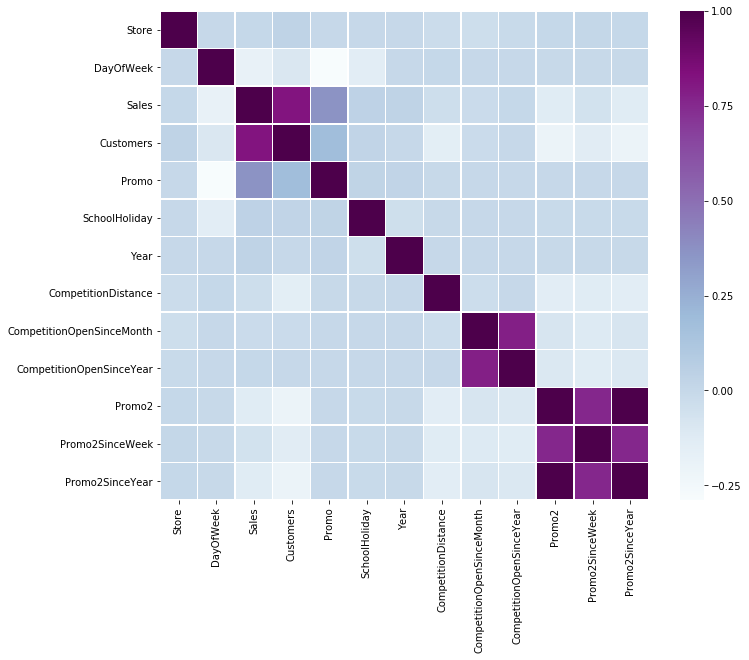

In [39]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_plot,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

## Univariates

### Sales 
- Histogram
- Trend
- Boxplot

In [0]:
## 'train' data univariates analysis
## find mean sales per day, per month, perdaycustomer.

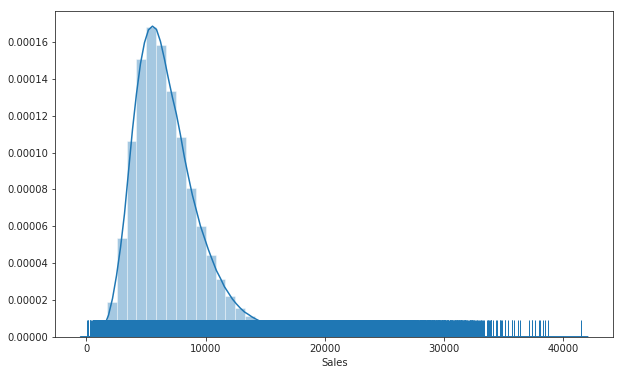

In [41]:
## Histograms for Sales
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.distplot(train.Sales, bins=50, rug=True,ax=ax);

In [0]:
trends = train.groupby('Month_Yr')['Sales'].mean()

In [0]:
trends = trends.reset_index()

In [0]:
trends.columns = ['Month_Yr', 'Mean']

In [45]:
trends.head()

,Month_Yr,Mean
0,2013-01,6240.506045
1,2013-02,6428.838730
2,2013-03,7213.092718
3,2013-04,6579.791664
4,2013-05,7077.028245


Text(0.5, 1.0, 'Sales Trends')

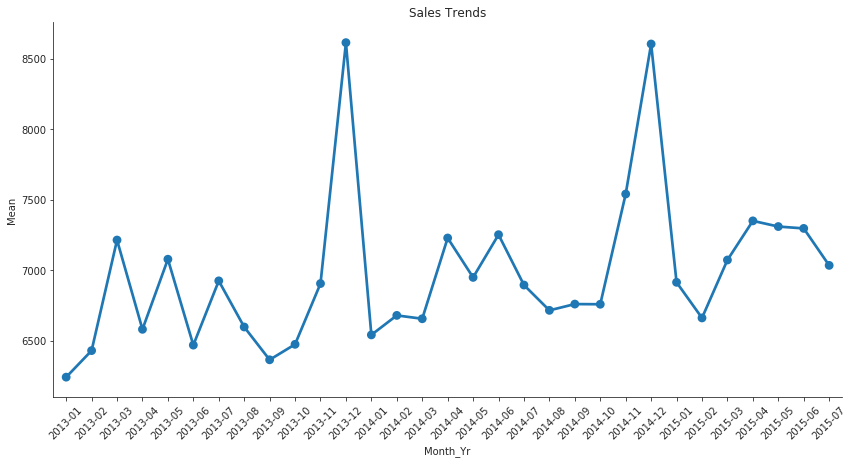

In [46]:
## Trends
# using Seaborn # 
t = sns.catplot(x="Month_Yr", y="Mean", kind="point",height=6, aspect=2, data=trends)
t.set_xticklabels(rotation=45)
plt.title('Sales Trends')

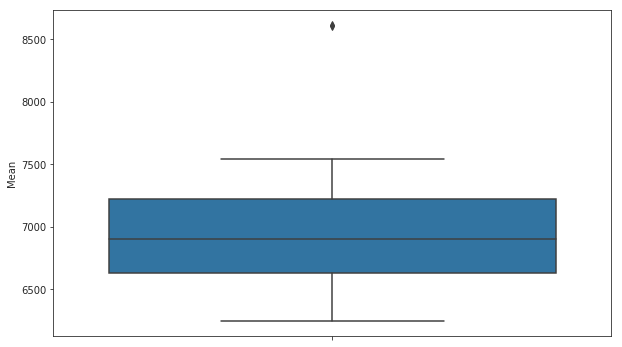

In [47]:
## Boxplot
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax = sns.boxplot(y=trends.Mean,ax=ax)

### Customers
- Histogram
- Trend
- Boxplot

In [0]:
cust_trends = train.groupby('Month_Yr')['Customers'].mean()

In [0]:
cust_trends = cust_trends.reset_index()

In [0]:
cust_trends.columns = ['Month_Yr', 'Customers']

In [51]:
cust_trends.head()

,Month_Yr,Customers
0,2013-01,706.060038
1,2013-02,721.252830
2,2013-03,787.690008
3,2013-04,749.062343
4,2013-05,791.018207


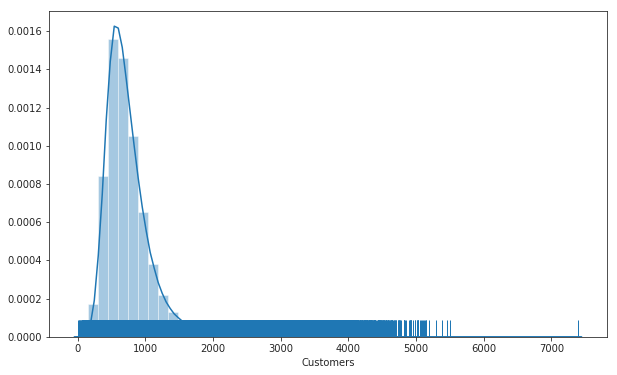

In [52]:
# Histogram
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.distplot(train.Customers, rug=True, ax=ax);

Text(0.5, 1.0, 'Customers Trends')

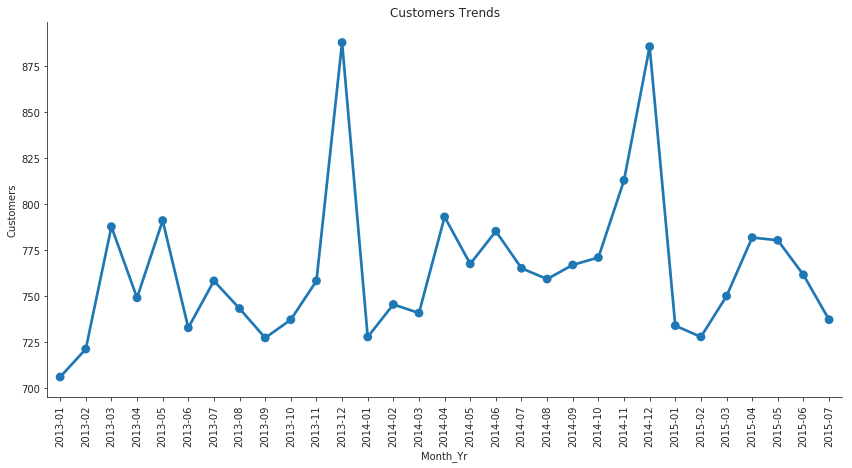

In [53]:
# Trends

t = sns.catplot(x="Month_Yr", y="Customers", kind="point", height=6, aspect=2, data=cust_trends)
t.set_xticklabels(rotation=90)
plt.title('Customers Trends')

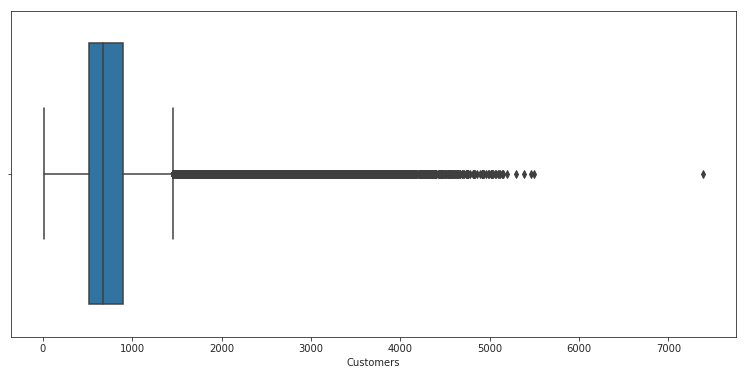

In [54]:
# Barplot
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(13, 6)
ax = sns.boxplot(x=train.Customers)

### Store Type and Assortment
- Count
- Barplots

In [55]:
store.describe(include=['object'])

,StoreType,Assortment,PromoInterval
count,1115,1115,1115
unique,4,3,4
top,a,a,0
freq,602,593,544


In [0]:
store_pivot = store.pivot_table(index=['StoreType','Assortment'],values=["Store"], aggfunc='count')

In [57]:
store_pivot

Store
StoreType Assortment       
a         a             381
          c             221
b         a               7
          b               9
          c               1
c         a              77
          c              71
d         a             128
          c             220

In [0]:
store_pivot = store_pivot.reset_index()

In [0]:
store_pivot.columns = ['StoreType','Assortment','Count' ]

In [60]:
store_pivot

,StoreType,Assortment,Count
0,a,a,381
1,a,c,221
2,b,a,7
3,b,b,9
4,b,c,1
5,c,a,77
6,c,c,71
7,d,a,128
8,d,c,220


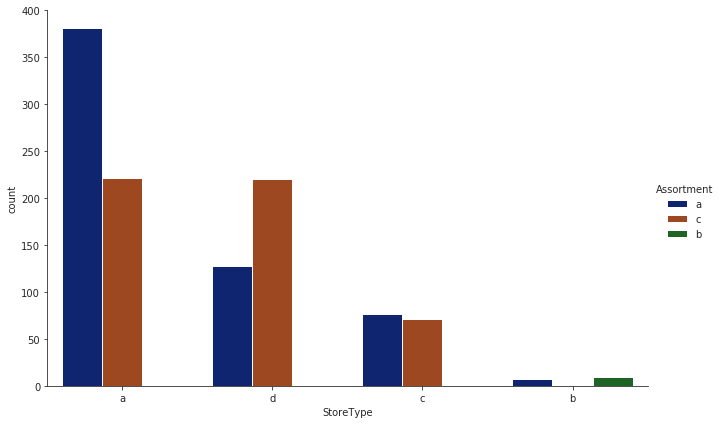

In [61]:
store_plot = sns.catplot(x="StoreType", hue="Assortment", data=store, kind="count", height=6, aspect=1.5, palette='dark', order=['a','d','c', 'b'] )


## Bivariates


### Day of Week
- Per Day Per Customer Sales
- Weekday - Weekend analysis
- StateHoliday and SchoolHoliday

In [0]:
pivot_daysales = train.pivot_table(index=['DayOfWeek'],values=["Sales","Customers"], aggfunc='mean')

In [63]:
pivot_daysales

,Customers,Sales
DayOfWeek,,
1,855.463641,8216.252259
2,770.018825,7088.409086
3,740.671932,6728.786679
4,755.670769,6768.214973
5,781.811113,7073.034133
6,660.205023,5875.084935
7,1441.532424,8224.723908


In [0]:
pivot_daysales = pivot_daysales.reset_index()

In [0]:
pivot_daysales.columns = ['DayOfWeek','AvgCustomers','AvgSales']

In [0]:
pivot_daysales["pdpcSales"] = pivot_daysales['AvgSales']/pivot_daysales['AvgCustomers']

In [0]:
pivot_daysales["Weekday"] = ["Weekday","Weekday","Weekday","Weekday","Weekday","Weekend","Weekend"]

In [68]:
pivot_daysales

,DayOfWeek,AvgCustomers,AvgSales,pdpcSales,Weekday
0,1,855.463641,8216.252259,9.604444,Weekday
1,2,770.018825,7088.409086,9.205501,Weekday
2,3,740.671932,6728.786679,9.084706,Weekday
3,4,755.670769,6768.214973,8.956566,Weekday
4,5,781.811113,7073.034133,9.046986,Weekday
5,6,660.205023,5875.084935,8.898879,Weekend
6,7,1441.532424,8224.723908,5.705542,Weekend


Note : Here we can see that, a Sunday is recording maximum number of average Customers as well as maximum average sales than any other Day.

In [0]:
pivot_weekend = pivot_daysales.pivot_table(index=['Weekday'],values=["AvgSales","AvgCustomers","pdpcSales"], aggfunc='mean')

In [70]:
pivot_weekend

,AvgCustomers,AvgSales,pdpcSales
Weekday,,,
Weekday,780.727256,7174.939426,9.179640
Weekend,1050.868724,7049.904421,7.302211


Note : Here we can see that, Weekends see more number of number of customers, but average sales as well the per day per customer sale is lesser than the weekdays. This might be due to more number of window shoppers. 

Now Let's see if School or State holiday have any effect on the sales and customers.

In [0]:
pivot_ScHoliday = train.pivot_table(index=['SchoolHoliday'],values=["Sales","Customers"], aggfunc='mean')

In [72]:
pivot_ScHoliday

,Customers,Sales
SchoolHoliday,,
0,757.879906,6897.207830
1,783.178586,7200.710282


In [0]:
pivot_ScHoliday = pivot_ScHoliday.reset_index()

In [0]:
pivot_ScHoliday["pdpcSales"] = pivot_ScHoliday['Sales']/pivot_ScHoliday['Customers']

In [75]:
pivot_ScHoliday

,SchoolHoliday,Customers,Sales,pdpcSales
0,0,757.879906,6897.207830,9.100661
1,1,783.178586,7200.710282,9.194212


In [0]:
pivot_StHoliday = train.pivot_table(index=['StateHoliday'],values=["Sales","Customers"], aggfunc='mean')

In [77]:
pivot_StHoliday

,Customers,Sales
StateHoliday,,
0,762.125501,6953.960229
a,1279.172911,8487.471182
b,1686.889655,9887.889655
c,1569.225352,9743.746479


In [0]:
pivot_StHoliday = pivot_StHoliday.reset_index()

In [0]:
pivot_StHoliday["pdpcSales"] = pivot_StHoliday['Sales']/pivot_StHoliday['Customers']

In [80]:
pivot_StHoliday

,StateHoliday,Customers,Sales,pdpcSales
0,0,762.125501,6953.960229,9.124429
1,a,1279.172911,8487.471182,6.635124
2,b,1686.889655,9887.889655,5.861610
3,c,1569.225352,9743.746479,6.209272


### Store Type & Assortment

In [0]:
# Now we will see if Store type and assortment affects Sales in any way
# Here we will use master table that was created at the beginnig of the notebook.


store_pivot = master_table.pivot_table(index=['StoreType','Assortment'],values=["Sales", "Customers"], aggfunc='mean')



In [0]:
store_pivot["PCustSale"] = store_pivot['Sales']/store_pivot['Customers']

In [83]:
store_pivot

Customers         Sales  PCustSale
StoreType Assortment                                      
a         a            759.311081   6538.189027   8.610686
          c            855.819997   7573.822775   8.849785
b         a           1804.982993  11133.992979   6.168475
          b           2067.550250   8642.503594   4.180069
          c           3105.053079  17969.556263   5.787198
c         a            839.963231   6835.748557   8.138152
          c            789.254567   7037.913129   8.917165
d         a            584.033083   6433.756093  11.016082
          c            619.063299   7043.534764  11.377730

In [0]:
Type_pivot = store_pivot.pivot_table(index=['StoreType'],values=["Sales", "Customers", "PCustSale"], aggfunc='mean')

In [85]:
Type_pivot

,Customers,PCustSale,Sales
StoreType,,,
a,807.565539,8.730235,7056.005901
b,2325.862107,5.378581,12582.017612
c,814.608899,8.527659,6936.830843
d,601.548191,11.196906,6738.645428


In [0]:
assort_pivot = store_pivot.pivot_table(index=['Assortment'],values=["Sales", "Customers", "PCustSale"], aggfunc='mean') 

In [87]:
assort_pivot

,Customers,PCustSale,Sales
Assortment,,,
a,997.072597,8.483349,7735.421664
b,2067.550250,4.180069,8642.503594
c,1342.297735,8.732969,9906.206733


Note : 
- Store Type : Store Type 'b' shows highest average Customers and highest average sales. But, Store Type 'd' show higher Per Customer Sale.

- Assortment : Assortment 'b' show highest average number of customers, but assortment 'c', has higher average sales as well as per customer sale statistics.

- When we combine the two, we can see Store Type 'b' having assortment 'c', has highest number of customers as well as Average Sales. However, Store Type 'd' having assortment 'c' tops the list when it comes to Per Customer Sales statistics.  

### Competition
- Competition Distance
- Competition Since

In [0]:
# master_table.plot(kind='scatter',x='CompetitionDistance',y='Sales',figsize=(15,4))

In [0]:
# ax = sns.catplot(x="CompetitionDistance", y="Sales", height=5, aspect=2, data=master_table)

### Promo
- Promo (from train data)
- Promo2
- Promo2 since
- Promo Interval

In [0]:
## Promo (train data)

count_promo = train.pivot_table(index=['Promo'],values=["Store"], aggfunc='count')

In [91]:
count_promo

,Store
Promo,
0,467463
1,376875


In [0]:
pivot_promo = train.pivot_table(index=['Promo'],values=["Sales", "Customers"], aggfunc='mean')

In [93]:
pivot_promo

,Customers,Sales
Promo,,
0,696.906080,5929.826183
1,844.481433,8228.739731


Note : Stores which are running promotions are attracting more number of customers as well as more average Sales.




In [0]:
## Promo2 and other variables


count_promo2 = master_table.pivot_table(index=['Promo2'],values=["Store"], aggfunc='count')



In [0]:
count_promo2 = count_promo2.reset_index()

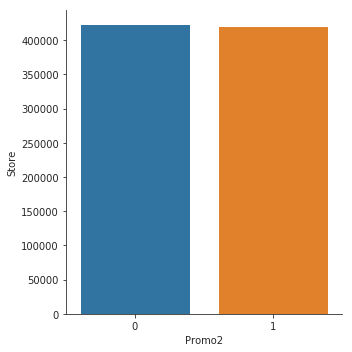

In [96]:
sns.catplot(data=count_promo2, kind="bar", x="Promo2", y="Store")

In [0]:
pivot_promo2 = master_table.pivot_table(index=['Promo2'],values=["Sales", "Customers"], aggfunc='mean')


In [98]:
pivot_promo2

,Customers,Sales
Promo2,,
0,843.685884,7350.818414
1,681.436855,6558.993542


Note : Stores that participated in consicutive Promotions are showing lesser average number of customers than the stores which are not participating in Promotion. The average sales follows the same pattern.

In [0]:
# Promo2 Since

# sns.catplot(x="Sales", y="Promo2SinceYear", kind="strip", data=master_table)


## Forecasting